<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/4_image_classification_zoo/Classifier%20-%20Plant%20Disease%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents


## Install Monk


## Using pretrained model for classifying plant diseases based on leaves


## Training a classifier from scratch

<a id='0'></a>
# Install Monk

## Using pip (Recommended)

  - colab (gpu) 
      - All bakcends: `pip install -U monk-colab`
      

  - kaggle (gpu) 
      - All backends: `pip install -U monk-kaggle`
      

  - cuda 10.2	
      - All backends: `pip install -U monk-cuda102`
      - Gluon bakcned: `pip install -U monk-gluon-cuda102`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda102`
      - Keras backend: `pip install -U monk-keras-cuda102`
      

  - cuda 10.1	
      - All backend: `pip install -U monk-cuda101`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda101`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda101`
	  - Keras backend: `pip install -U monk-keras-cuda101`
      

  - cuda 10.0	
      - All backend: `pip install -U monk-cuda100`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda100`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda100`
	  - Keras backend: `pip install -U monk-keras-cuda100`
      

  - cuda 9.2	
      - All backend: `pip install -U monk-cuda92`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda92`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda92`
	  - Keras backend: `pip install -U monk-keras-cuda92`
      

  - cuda 9.0	
      - All backend: `pip install -U monk-cuda90`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda90`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda90`
	  - Keras backend: `pip install -U monk-keras-cuda90`
      

  - cpu 		
      - All backend: `pip install -U monk-cpu`
	  - Gluon bakcned: `pip install -U monk-gluon-cpu`
	  - Pytorch backend: `pip install -U monk-pytorch-cpu`
	  - Keras backend: `pip install -U monk-keras-cpu`

## Install Monk Manually (Not recommended)
 
### Step 1: Clone the library
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 
 
 
### Step 2: Install requirements 
 - Linux
     - Cuda 9.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu90.txt`
     - Cuda 9.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu92.txt`
     - Cuda 10.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu100.txt`
     - Cuda 10.1
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu101.txt`
     - Cuda 10.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Linux && pip install -r requirements_cpu.txt`
 
 
  - Windows
     - Cuda 9.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu90.txt`
     - Cuda 9.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu92.txt`
     - Cuda 10.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu100.txt`
     - Cuda 10.1 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu101.txt`
     - Cuda 10.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cpu.txt`
         
         
  - Mac
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Mac && pip install -r requirements_cpu.txt`
         
         
  - Misc
      - Colab (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_colab.txt`
      - Kaggle (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt`
 
 
 
### Step 3: Add to system path (Required for every terminal or kernel run)
 - `import sys`
 - `sys.path.append("monk_v1/");`

# Used trained classifier for demo

In [1]:
#Using pytorch backend 

# When installed using pip
from monk.pytorch_prototype import prototype


# When installed manually (Uncomment the following)
#import os
#import sys
#sys.path.append("monk_v1/");
#sys.path.append("monk_v1/monk/");
#from monk.pytorch_prototype import prototype

In [2]:
# Download trained weights

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1EHsJ-sXMNIbZiiVmyl7FuqnLX50kx04k' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1EHsJ-sXMNIbZiiVmyl7FuqnLX50kx04k" -O cls_plantvillage_trained.zip && rm -rf /tmp/cookies.txt

In [4]:
! unzip -qq cls_plantvillage_trained.zip 

In [5]:
ls workspace/Project-Plant-Disease

Pytorch-resnet18/  Pytorch-resnet34/  Pytorch-resnet50/


In [6]:
# Load project in inference mode

gtf = prototype(verbose=1);
gtf.Prototype("Project-Plant-Disease", "Pytorch-resnet18", eval_infer=True);

#Other trained models - uncomment 
#gtf.Prototype("Project-Plant-Disease", "Pytorch-resnet34", eval_infer=True);
#gtf.Prototype("Project-Plant-Disease", "Pytorch-resnet50", eval_infer=True);

Pytorch Version: 1.4.0

Model Details
    Loading model - workspace/Project-Plant-Disease/Pytorch-resnet18/output/models/final
    Model loaded!

Experiment Details
    Project: Project-Plant-Disease
    Experiment: Pytorch-resnet18
    Dir: /home/ubuntu/Desktop/cls/workspace/Project-Plant-Disease/Pytorch-resnet18/



In [7]:
#Infer

Prediction
    Image name:         workspace/test/1.jpg
    Predicted class:      1
    Predicted score:      1.0



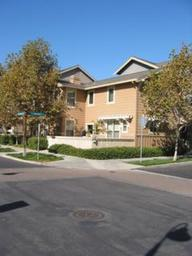

In [8]:
img_name = "workspace/test/1.jpg"
predictions = gtf.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         workspace/test/2.jpg
    Predicted class:      5
    Predicted score:      0.9999886155128479



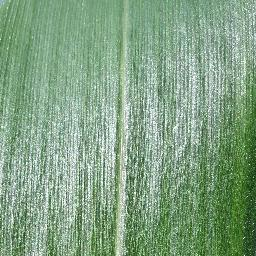

In [9]:
img_name = "workspace/test/2.jpg"
predictions = gtf.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         workspace/test/3.jpg
    Predicted class:      10
    Predicted score:      0.9999942779541016



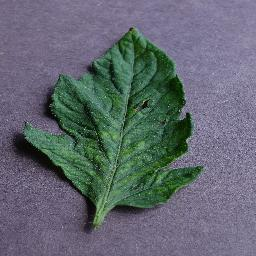

In [10]:
img_name = "workspace/test/3.jpg"
predictions = gtf.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         workspace/test/4.jpg
    Predicted class:      15
    Predicted score:      1.0



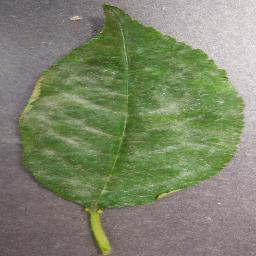

In [11]:
img_name = "workspace/test/4.jpg"
predictions = gtf.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)

# Training custom classifier from scratch

# Plant Disease Classification with Monk

In [ ]:
from monk.pytorch_prototype import prototype

## Dataset

The dataset was gathered by the awesome team at [Plant Village](https://plantvillage.org)

The dataset is preprocessed and re-shared via dropbox.

In [ ]:
!wget https://www.dropbox.com/s/hgt9uystjlinzlp/plantVillage.zip

In [ ]:
!unzip plantVillage.zip

## Create Experiment

In [ ]:
# Step 1 - Create experiment
ptf = prototype(verbose=1);
ptf.Prototype("plant_disease", "exp1");

In [ ]:
ptf.Default(dataset_path=["./dataset/train", "./dataset/val"], model_name="resnet18", freeze_base_network=True, num_epochs=5);

## Use Quick model finder

In [ ]:
# Analysis - 1

# Analysis Project Name
analysis_name = "Model_Finder";

# Models to analyse
# First element in the list- Model Name
# Second element in the list - Boolean value to freeze base network or not
# Third element in the list - Boolean value to use pretrained model as the starting point or not
models = [["resnet34", True, True], ["resnet50", False, True], 
          ["densenet121", False, True], ["densenet169", True, True], ["densenet201", True, True]];  

# Num epochs for each experiment to run	
epochs=5;

# Percentage of original dataset to take in for experimentation
percent_data=10;

# "keep_all" - Keep all the sub experiments created
# "keep_non" - Delete all sub experiments created
ptf.Analyse_Models(analysis_name, models, percent_data, num_epochs=epochs, state="keep_none"); 

## Update the model

In [ ]:
## Update Model Architecture
ptf.update_model_name("densenet121");
ptf.update_freeze_base_network(True);
ptf.update_use_pretrained(True);
ptf.Reload();

## Find the right batch size

In [ ]:
#Analysis - 2

# Analysis Project Name
analysis_name = "Batch_Size_Finder";

# Batch sizes to explore
batch_sizes = [4, 8, 16, 32];

# Num epochs for each experiment to run	
epochs = 10;

# Percentage of original dataset to take in for experimentation
percent_data = 10;

# "keep_all" - Keep all the sub experiments created
# "keep_non" - Delete all sub experiments created	
ptf.Analyse_Batch_Sizes(analysis_name, batch_sizes, percent_data, num_epochs=epochs, state="keep_none"); 

## Update batch size

In [ ]:
## Update Batch Size
ptf.update_batch_size(8);
ptf.Reload();

## Find the correct input dimension

In [ ]:
#Analysis - 3

# Analysis Project Name
analysis_name = "Input_Size_Finder";

# Input sizes to explore	
input_sizes = [224, 256, 512];

# Num epochs for each experiment to run	
epochs=5;

# Percentage of original dataset to take in for experimentation
percent_data=10;

# "keep_all" - Keep all the sub experiments created
# "keep_non" - Delete all sub experiments created	
ptf.Analyse_Input_Sizes(analysis_name, input_sizes, percent_data, num_epochs=epochs, state="keep_none"); 

## Update input size

In [ ]:
## Update Input Size

ptf.update_input_size(224);
ptf.Reload();

## Findout the correct starting LR

In [ ]:
#Analysis - 4

# Analysis Project Name
analysis_name = "Learning_Rate_Finder"

# Learning rates to explore
lrs = [0.01, 0.005, 0.001, 0.0001];

# Num epochs for each experiment to run
epochs=5

# Percentage of original dataset to take in for experimentation
percent_data=10

# "keep_all" - Keep all the sub experiments created
# "keep_non" - Delete all sub experiments created
ptf.Analyse_Learning_Rates(analysis_name, lrs, percent_data, num_epochs=epochs, state="keep_none"); 

## Update LR

In [ ]:
## Update Learning Rate
ptf.update_learning_rate(0.01);
ptf.Reload();

## Optimiser hunting

In [ ]:
# Analysis - 5
# Analysis Project Name
analysis_name = "Optimiser_Finder";

# Optimizers to explore
optimizers = ["sgd", "adam", "adamax", "rmsprop"];   #Model name, learning rate

# Num epochs for each experiment to run	
epochs = 5;

# Percentage of original dataset to take in for experimentation
percent_data = 10;

# "keep_all" - Keep all the sub experiments created
# "keep_non" - Delete all sub experiments created
ptf.Analyse_Optimizers(analysis_name, optimizers, percent_data, num_epochs=epochs, state="keep_none"); 

## Update optimiser

In [ ]:
## Update Optimiser

ptf.optimizer_adamax(0.001);
ptf.Reload();

### Set intermediate state saving to false

This step reduces the size of our workspaces

In [ ]:
ptf.update_save_intermediate_models(False);

## Train

In [ ]:
ptf.Train();

We can see that the losses can still go down. Next we create a new experiment using 'copy_experiment' and resume training to achieve further improvement.

In [ ]:
ptf = prototype(verbose=1);
ptf.Prototype("plant_disease", "exp2", copy_from=["plant_disease", "exp1"]);

In [ ]:
ptf.Summary()

In [ ]:
ptf.update_num_epochs(10)
ptf.Reload()

In [ ]:
ptf.Train()

## Compare

In [ ]:
from monk.compare_prototype import compare

In [ ]:
ctf = compare(verbose=1);
ctf.Comparison("plant_disease");

In [ ]:
ctf.Add_Experiment("plant_disease", "exp1");
ctf.Add_Experiment("plant_disease", "exp2");

In [ ]:
ctf.Generate_Statistics()

## Inference

In [ ]:
import numpy as np
import PIL.Image as Image
import requests

test_url = "https://gardenerspath.com/wp-content/uploads/2019/08/Frogeye-spots-Botryosphaeria-obtusa-on-apple-leaf-FB.jpg"

# URL of the image to be downloaded is defined as image_url 
r = requests.get(test_url) # create HTTP response object 
with open('test.jpg','wb') as f: 
    f.write(r.content) 

test = Image.open('./test.jpg')
test

In [ ]:
ptf = prototype(verbose=1);
ptf.Prototype("plant_disease", "exp2", eval_infer=True);

In [ ]:
img_name = "test.jpg";
predictions = ptf.Infer(img_name=img_name, return_raw=True);
print(predictions)

In [ ]:
import csv

def read_labels():
    mydict = {}
    with open('./dataset/labels.csv', mode='r') as infile:
        reader = csv.reader(infile)
        with open('labels_new.csv', mode='w') as outfile:
            writer = csv.writer(outfile)
            mydict = {rows[0]:rows[1] for rows in reader}
    return mydict

def predict_label(predictions):
    pred_class = predictions['predicted_class']
    label_dict = read_labels()
    out_label = label_dict[pred_class]
    return out_label

print("Predicted class for test image is : {}".format(predict_label(predictions)))
